In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 hours 38 mins
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,"28 days, 4 hours and 51 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_b6b215
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,786 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
data_path = "train_data__df2catencode_ultimate_multi.csv"

# Load data into H2O
df = h2o.import_file(data_path)
df = df.drop('C1')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
df

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
8,2,3,2,55,31.9855,31.9855,31.9855,very_fast,50
2,2,3,2,55,18.4928,31.9855,31.9855,very_long_normal,50
10,2,3,2,55,31.9855,38.4928,38.4928,long_normal,50
26,2,3,2,55,27.3285,18.4928,37.3285,very_long_normal,50
26,2,3,2,55,31.7464,37.3285,39.2464,very_long_normal,50
23,2,3,2,55,33.4928,39.2464,40.3971,fast,35.4403
32,3,3,2,55,34.3971,34.3971,18.4928,very_fast,50
23,3,3,2,55,29.4976,31.9855,36.1643,very_long_normal,53.2079
1,4,3,2,55,31.9855,27.3285,37.4265,long,7.81604
10,3,3,2,55,43.4928,29.4976,39.6232,long_normal,50


In [4]:
df.describe()

Rows:318438
Cols:10

,Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
type,int,int,int,int,int,real,real,real,enum,real
mins,1.0,1.0,1.0,0.0,5.0,17.328501414194704,18.39710084851682,9.497584040430686,,7.816040607143563
mean,18.31884071624617,2.6256539734579407,1.9084625578605567,3.284099259510485,45.27853145667283,32.87907996529926,32.78353585024369,32.736854319240415,,50.260501568672474
maxs,32.0,4.0,3.0,32.0,95.0,43.49275212129206,43.56943676256436,40.39710084851682,,112.9535469594144
sigma,8.633754885795048,0.8730604938237947,0.6628857004044935,1.7640613895592008,19.585263126066597,1.0316564756930566,4.116346744445844,1.7714040252455727,,5.7697512884693944
zeros,0,0,0,22,0,0,0,0,,0
missing,0,0,0,0,0,0,0,0,0,0
0,8.0,2.0,3.0,2.0,55.0,31.985504242584113,31.985504242584113,31.985504242584113,very_fast,50.0
1,2.0,2.0,3.0,2.0,55.0,18.492752121292057,31.985504242584113,31.985504242584113,very_long_normal,50.0
2,10.0,2.0,3.0,2.0,55.0,31.985504242584113,38.49275212129206,38.49275212129206,long_normal,50.0


In [5]:
y = "Stay"
x = df.columns
x.remove(y)

In [6]:
aml = H2OAutoML(max_runtime_secs = 1000, seed = 1)
#aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |██████████████████████████████████████
16:29:40.125: GBM_1_AutoML_3_20230822_161945 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_3_20230822_161945_cv_1.  Details: ERRR on field: _ntrees: The tree model will not fit in the driver node's memory (143.7 KB per tree x 10000 > 394.8 MB) - try decreasing ntrees and/or max_depth or increasing min_rows!


█████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_3_20230822_161945


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/2
# XGBoost base models (used / total)  1/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.52914633554965
RMSE: 0.727424453499915
LogLoss: 1.4481599550006243
Null degrees of freedom: 9880
Residual degrees of freedom: 9759
Null deviance: 37588.120946904215
Residual deviance: 28618.537030722342
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
big_infinity    fast    infinity    long    long_normal    normal    small_infinity    super_very_long    very_fast    very_long    very_long_normal    Error     Rate
--------------  ------  ----------  ------  -------------  --------  ----------------  -----------------  -----------  -----------  ------------------  --------  -------------
111             4       0           54      10             15        16                1                  0            0            0                   0.473934  100 / 211
0               1118    0           74      90             1099      0                 0                  5            0            0                   0.531433  1,268 / 2,386
11              3       3           43      9              10        2                 0                  0            0            0                   0.962963  78 / 81
13              57      0           643     138            194       13                0                  0            0            0                   0.39225   415 / 1,058
3               227     0           259     437            778       0                 1                  1            0            0                   0.743845  1,269 / 1,706
2               413     0           41      29             2252      1                 0                  1            0            0                   0.177802  487 / 2,739
4               2       0           67      12             8         44                0                  0            0            0                   0.678832  93 / 137
18              13      0           188     47             44        1                 11                 0            0            0                   0.965839  311 / 322
0               314     0           4       2              404       0                 0                  34           0            0                   0.955145  724 / 758
2               10      0           16      4              57        1                 0                  0            0            0                   1         90 / 90
4               45      0           34      25             282       0                 0                  3            0            0                   1         393 / 393
168             2206    3           1423    803            5143      78                13                 44           0            0                   0.529096  5,228 / 9,881

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.470904
2    0.701346
3    0.844854
4    0.916911
5    0.95628
6    0.974193
7    0.986945
8    0.993523
9    0.996559
10   0.998988

ModelMetricsMultinomialGLM: stackedensem

In [7]:
lb = aml.leaderboard

In [8]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_3_20230822_161945,0.763801,1.55159,0.738819,0.545854
XGBoost_1_AutoML_3_20230822_161945,0.766053,1.57987,0.747238,0.558365
XGBoost_2_AutoML_3_20230822_161945,0.839179,2.16636,0.882611,0.779003
GLM_1_AutoML_3_20230822_161945,0.898582,1.83278,0.807794,0.65253


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_1_AutoML_3_20230822_161945,0.705835,1.43232,0.726326,0.527549,49277,0.006534,XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_3_20230822_161945,0.721762,1.44865,0.727773,0.529653,376996,0.015697,StackedEnsemble
XGBoost_2_AutoML_3_20230822_161945,0.800615,2.11477,0.875743,0.766926,3111,0.000557,XGBoost
GLM_1_AutoML_3_20230822_161945,0.909092,1.88712,0.816571,0.666789,19340,0.000376,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_3_20230822_161945

big_infinity,fast,infinity,long,long_normal,normal,small_infinity,super_very_long,very_fast,very_long,very_long_normal,Error,Rate
3390.0,196.0,1.0,1882.0,349.0,511.0,308.0,44.0,2.0,0.0,0.0,0.4927428,"3,293 / 6,683"
8.0,35460.0,0.0,2691.0,3074.0,36756.0,7.0,4.0,139.0,0.0,0.0,0.5461933,"42,679 / 78,139"
326.0,108.0,64.0,1454.0,388.0,366.0,21.0,36.0,2.0,0.0,0.0,0.9768535,"2,701 / 2,765"
409.0,1982.0,0.0,21103.0,4955.0,6146.0,390.0,22.0,11.0,0.0,0.0,0.3973671,"13,915 / 35,018"
161.0,6895.0,0.0,8277.0,13908.0,25777.0,65.0,35.0,41.0,0.0,0.0,0.7478562,"41,251 / 55,159"
91.0,13054.0,0.0,1509.0,993.0,71598.0,98.0,1.0,147.0,0.0,0.0,0.1816530,"15,893 / 87,491"
330.0,120.0,0.0,2183.0,312.0,354.0,1534.0,4.0,1.0,0.0,0.0,0.6829268,"3,304 / 4,838"
598.0,464.0,1.0,5673.0,1592.0,1382.0,91.0,450.0,3.0,0.0,0.0,0.9561147,"9,804 / 10,254"
0.0,9917.0,0.0,67.0,67.0,12554.0,0.0,0.0,999.0,0.0,0.0,0.9576767,"22,605 / 23,604"
72.0,246.0,0.0,539.0,197.0,1642.0,37.0,8.0,3.0,0.0,0.0,1.0,"2,744 / 2,744"


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

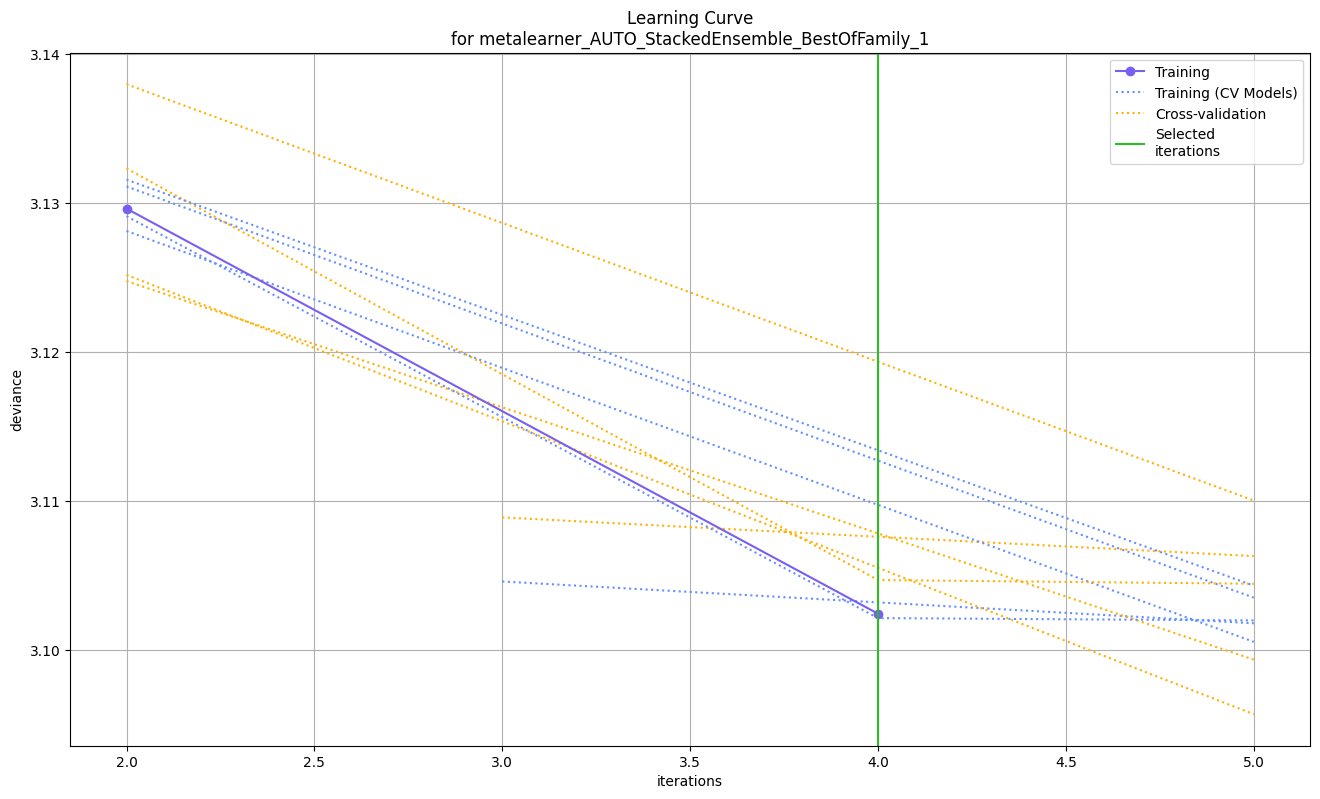

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

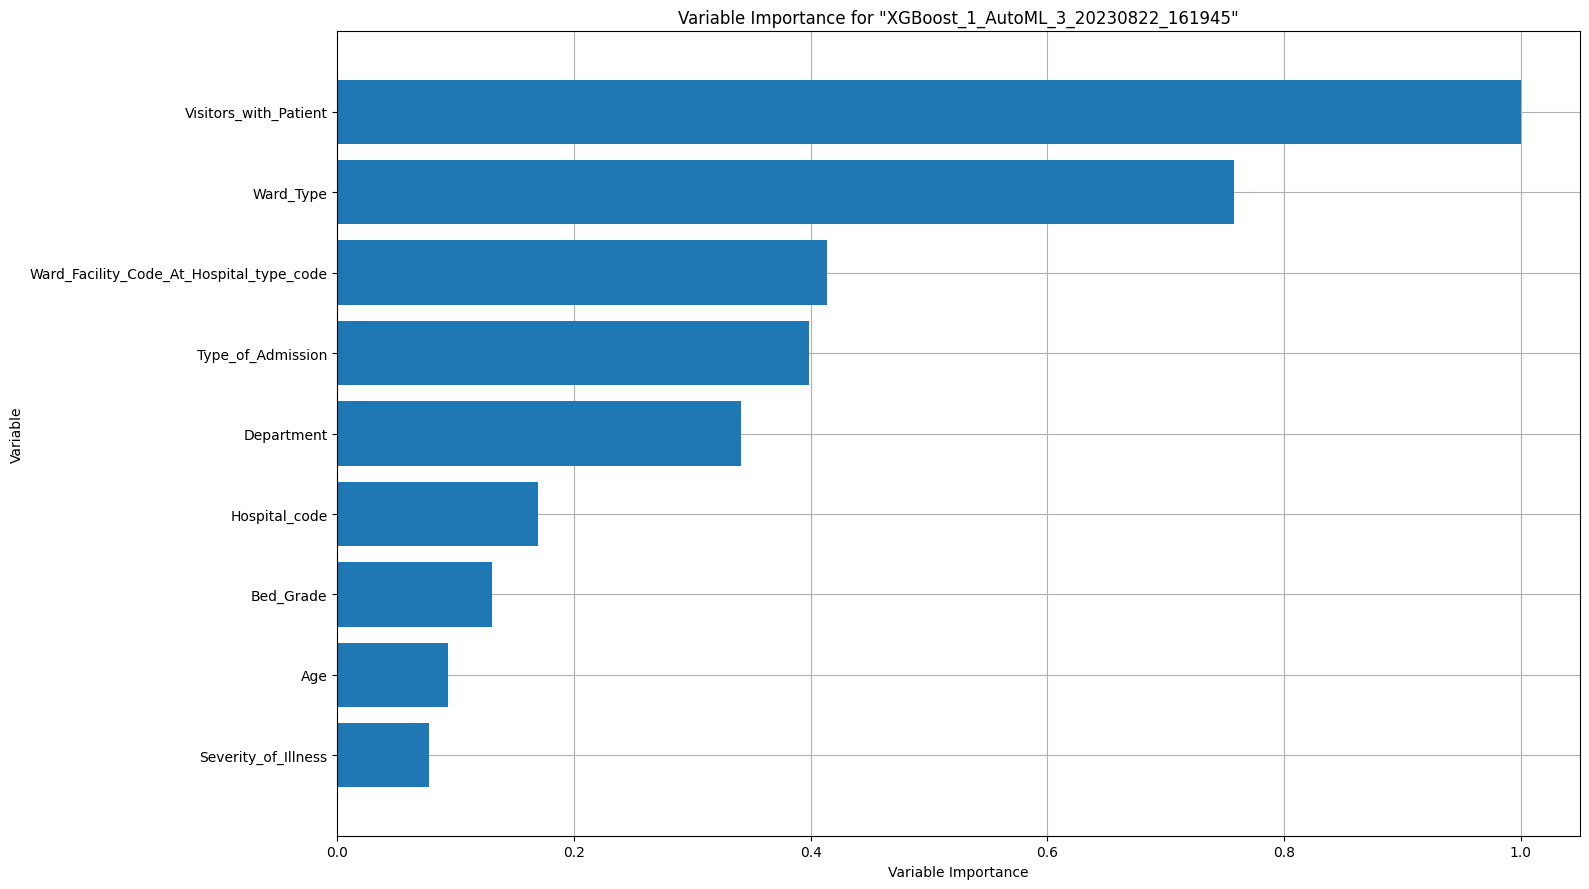

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

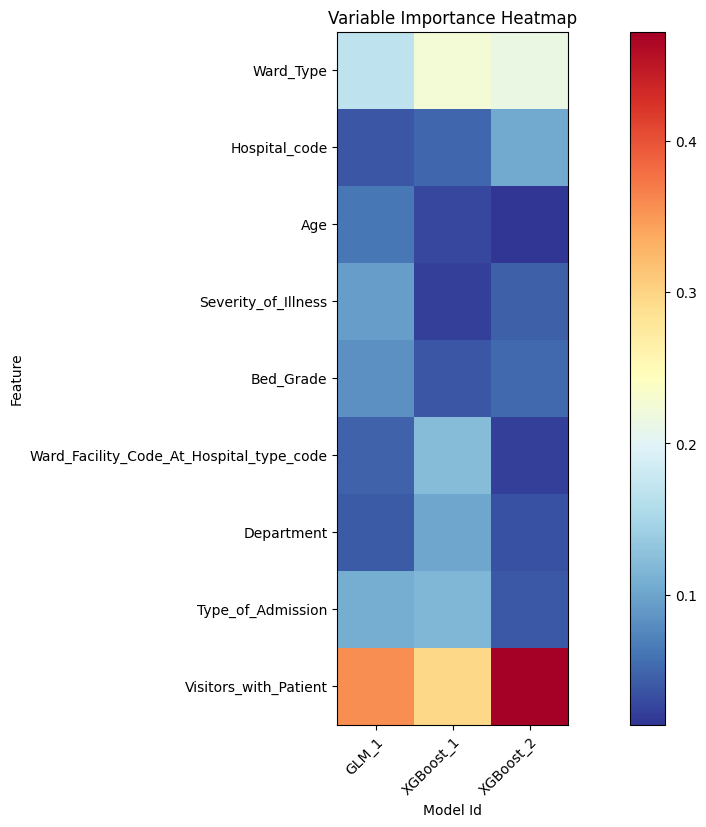

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

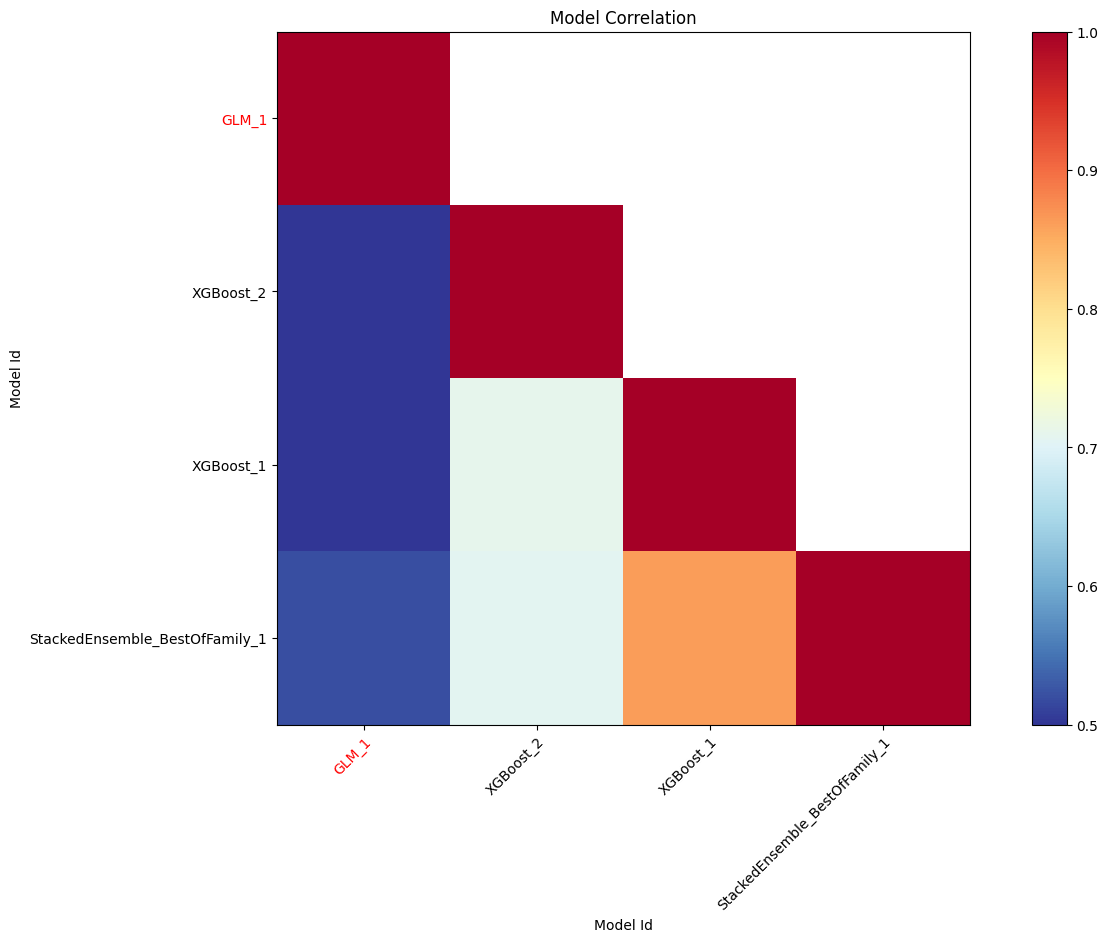

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

Job request failed HTTP 500 Server Error:
<html>
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8"/>
<title>Error 500 Server Error</title>
</head>
<body><h2>HTTP ERROR 500</h2>
<p>Problem accessing /3/Jobs/$03017f00000132d4ffffffff$_b2d9669601dcd6c718b117d148cd4cc9. Reason:
<pre>    Server Error</pre></p><h3>Caused by:</h3><pre>java.lang.OutOfMemoryError: Java heap space
</pre>

</body>
</html>
, will retry after 3s.
Job request failed HTTP 500 Server Error:
<html>
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8"/>
<title>Error 500 Server Error</title>
</head>
<body><h2>HTTP ERROR 500</h2>
<p>Problem accessing /3/Jobs/$03017f00000132d4ffffffff$_b2d9669601dcd6c718b117d148cd4cc9. Reason:
<pre>    Server Error</pre></p><h3>Caused by:</h3><pre>java.lang.OutOfMemoryError: Java heap space
</pre>

</body>
</html>
, will retry after 3s.
Job request failed Unexpected HTTP error: ('Connection aborted.', RemoteDisconnected('Remote end closed connecti

In [ ]:
aml.explain(df)